# Setup

In [1]:
from pycoils import PyCOILS
import matplotlib.pyplot as plt

In [2]:
predictor = PyCOILS()

In [3]:
dpi=150
figure_folder = 'figures'

In [4]:
!mkdir -p figures

# Sample sequences

## Standard COILS

>sp|P03069.1|GCN4_YEAST RecName: Full=General control protein GCN4, AltName: Full=Amino acid biosynthesis regulatory protein


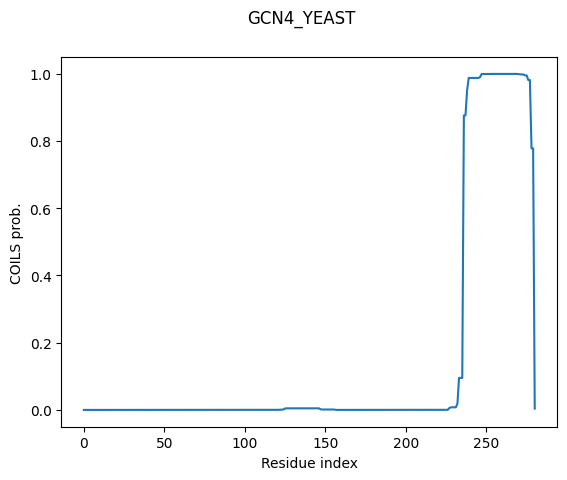

>sp|Q9BW19|KIFC1_HUMAN Kinesin-like protein KIFC1 OS=Homo sapiens OX=9606 GN=KIFC1 PE=1 SV=2


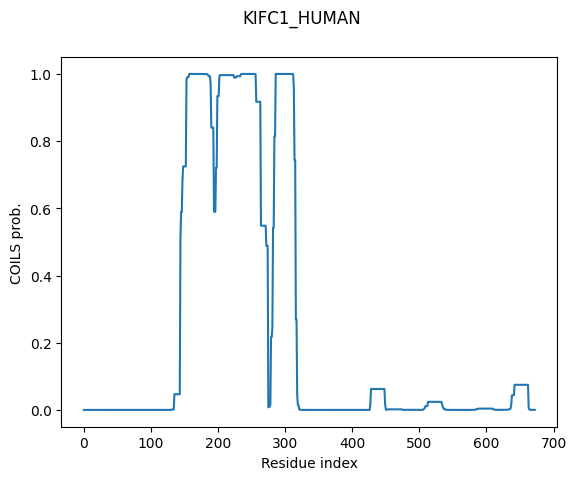

>sp|P12882|MYH1_HUMAN Myosin-1 OS=Homo sapiens OX=9606 GN=MYH1 PE=1 SV=3


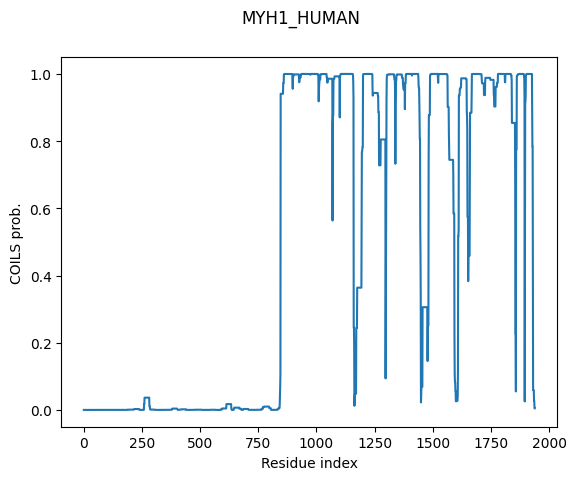

In [5]:
generator_results = predictor.run_on_file('sample_sequences/sample_sequences.fasta')

for header, result in generator_results:
    print(header)
    title = header.split('|')[2].split()[0]
    coils_prob = result['coils_prob']
    plt.plot(coils_prob)
    plt.ylabel('COILS prob.')
    plt.xlabel('Residue index')
    plt.suptitle(title)
    plt.savefig(f"{figure_folder}/simple_{title}.png")
    plt.show()

## Advanced COILS: Scores

>sp|P03069.1|GCN4_YEAST RecName: Full=General control protein GCN4, AltName: Full=Amino acid biosynthesis regulatory protein


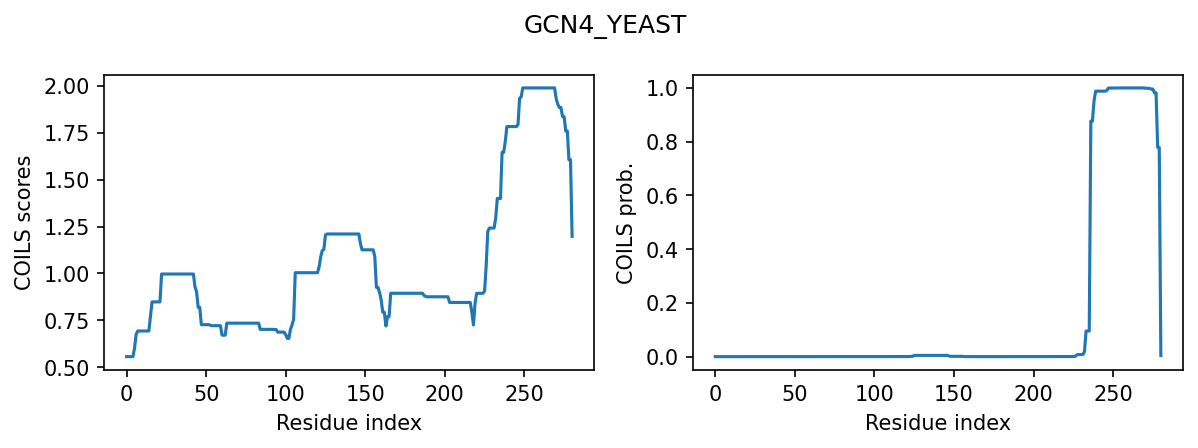

>sp|Q9BW19|KIFC1_HUMAN Kinesin-like protein KIFC1 OS=Homo sapiens OX=9606 GN=KIFC1 PE=1 SV=2


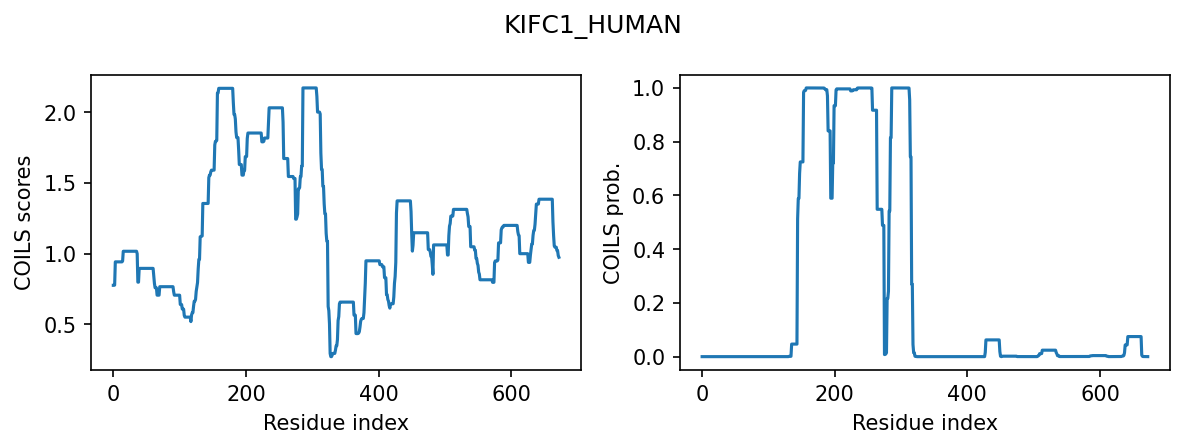

>sp|P12882|MYH1_HUMAN Myosin-1 OS=Homo sapiens OX=9606 GN=MYH1 PE=1 SV=3


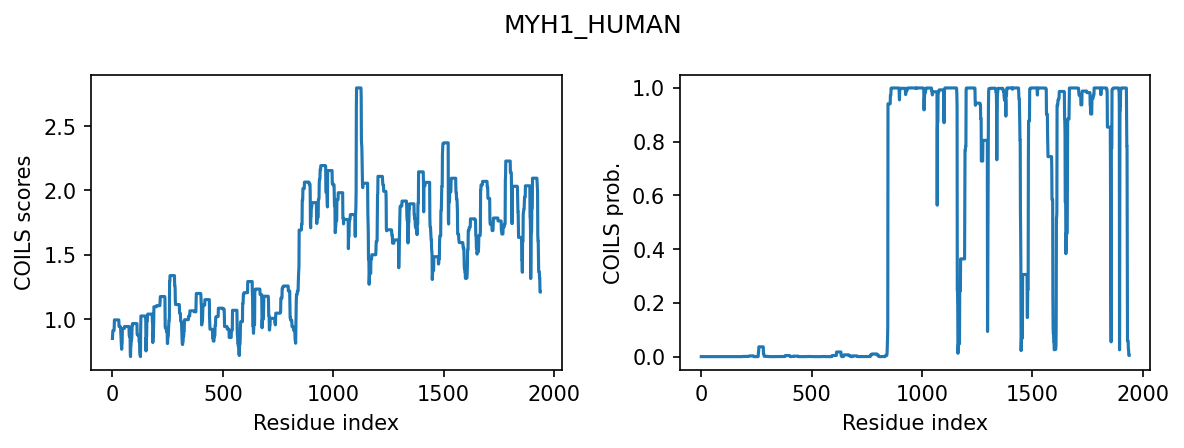

In [6]:
generator_results = predictor.run_on_file('sample_sequences/sample_sequences.fasta', return_scores=True)

for header, result in generator_results:
    print(header)
    title = header.split('|')[2].split()[0]
    coils_prob = result['coils_prob']
    coils_scores = result['coils_scores']
    fig, axarr = plt.subplots(ncols=2, figsize=(8,3), dpi=dpi)
    axarr[0].plot(coils_scores)
    axarr[0].set_ylabel('COILS scores')
    axarr[0].set_xlabel('Residue index')
    axarr[1].plot(coils_prob)
    axarr[1].set_ylabel('COILS prob.')
    axarr[1].set_xlabel('Residue index')
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(f"{figure_folder}/scores_{title}.png")
    plt.show()

## Advanced COILS: All frames

>sp|P03069.1|GCN4_YEAST RecName: Full=General control protein GCN4, AltName: Full=Amino acid biosynthesis regulatory protein


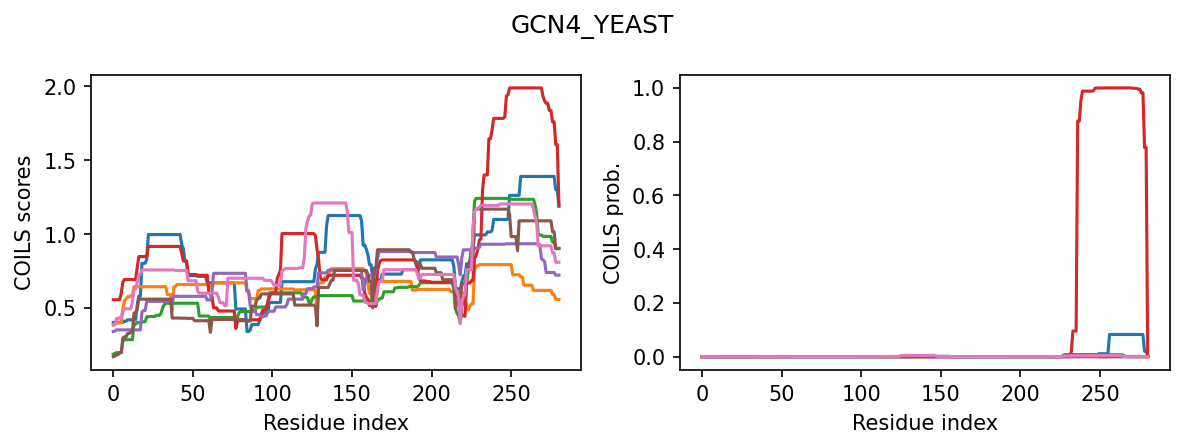

>sp|Q9BW19|KIFC1_HUMAN Kinesin-like protein KIFC1 OS=Homo sapiens OX=9606 GN=KIFC1 PE=1 SV=2


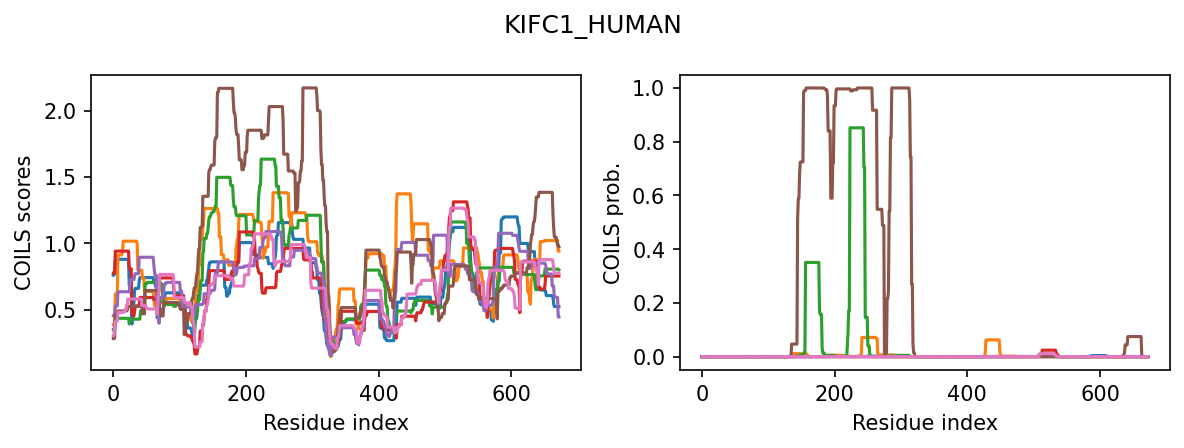

>sp|P12882|MYH1_HUMAN Myosin-1 OS=Homo sapiens OX=9606 GN=MYH1 PE=1 SV=3


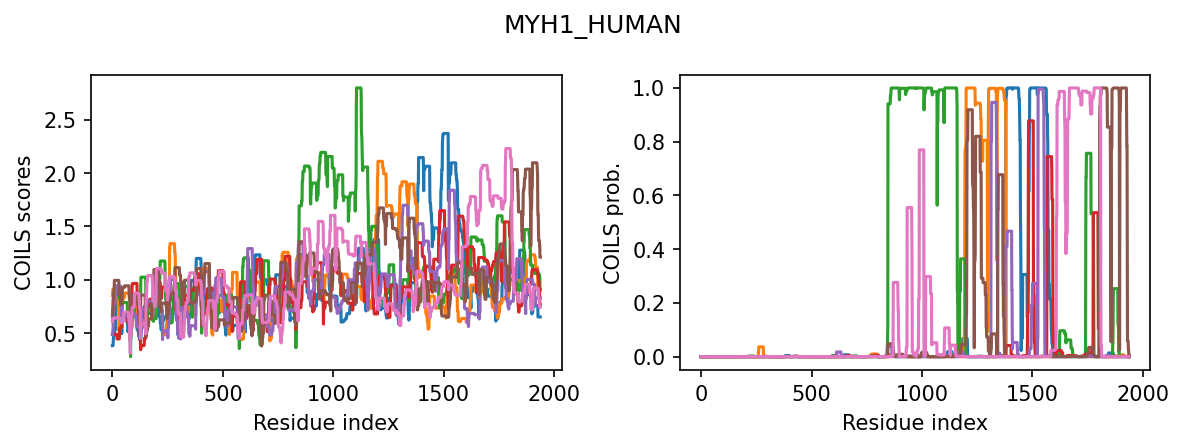

In [7]:
generator_results = predictor.run_on_file('sample_sequences/sample_sequences.fasta', frame='all', return_scores=True)

for header, result in generator_results:
    print(header)
    title = header.split('|')[2].split()[0]
    coils_prob = result['coils_prob'].T
    coils_scores = result['coils_scores'].T
    fig, axarr = plt.subplots(ncols=2, figsize=(8,3), dpi=dpi)
    axarr[0].plot(coils_scores)
    axarr[0].set_ylabel('COILS scores')
    axarr[0].set_xlabel('Residue index')
    axarr[1].plot(coils_prob)
    axarr[1].set_ylabel('COILS prob.')
    axarr[1].set_xlabel('Residue index')
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(f"{figure_folder}/allframe_{title}.png")
    plt.show()

# Run tests

In [8]:
from pycoils import testing

In [9]:
testing.run_tests(graphics=False)

################################################################################

Testing sequence parser...

################################################################################

Testing vs original COILS...

COILS vs PyCOILS @ matrix MTK w 14: [OK]
COILS vs PyCOILS @ matrix MTK w 21: [OK]
COILS vs PyCOILS @ matrix MTK w 28: [OK]
COILS vs PyCOILS @ matrix MTK uw 14: [OK]
COILS vs PyCOILS @ matrix MTK uw 21: [OK]
COILS vs PyCOILS @ matrix MTK uw 28: [OK]
################################################################################

Testing prediction...

Size of coiled-coil probability vector: (281,)
Size of coiled-coil score vector: (281,)
Size of register list: 281

___________________________________CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC_
cdefgabcdefgabcdefgabcdebbfgabcefgabcdefgabcdefgabcdefgabcdefgabcdefgabcdefgabcd
HLGVVAYNRKQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENEVARLKKLVGER
#################################################################

# Compare to reference COILS

COILS vs PyCOILS @ matrix MTK w 14: [OK]


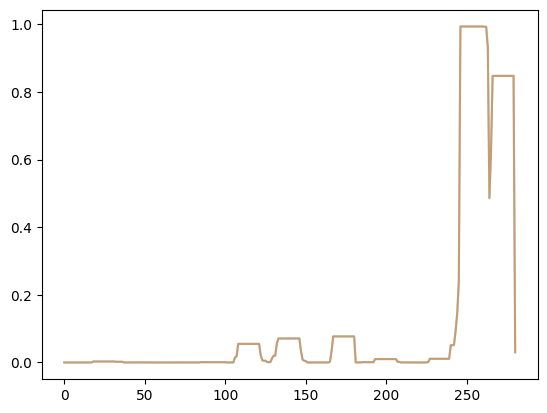

COILS vs PyCOILS @ matrix MTK w 21: [OK]


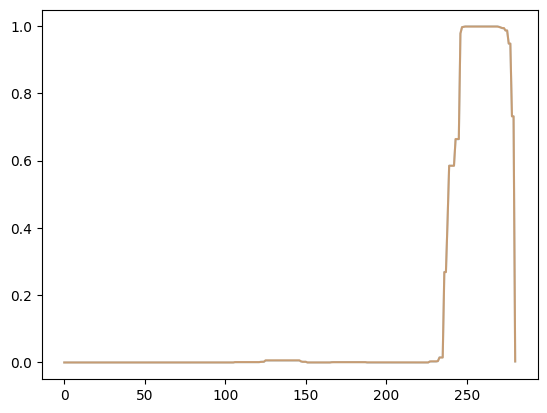

COILS vs PyCOILS @ matrix MTK w 28: [OK]


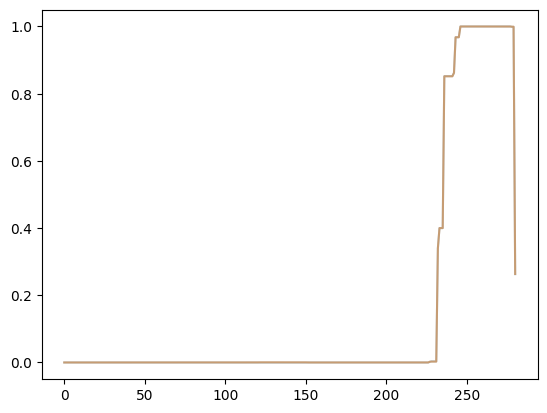

COILS vs PyCOILS @ matrix MTK uw 14: [OK]


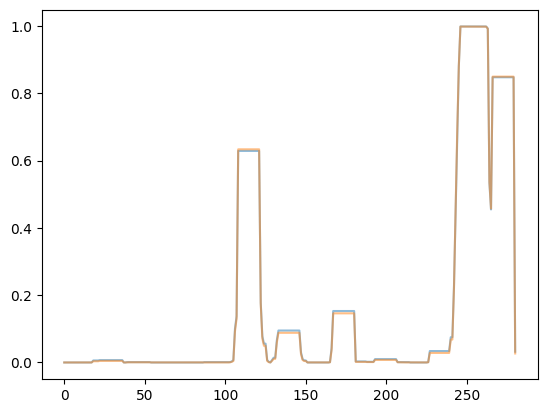

COILS vs PyCOILS @ matrix MTK uw 21: [OK]


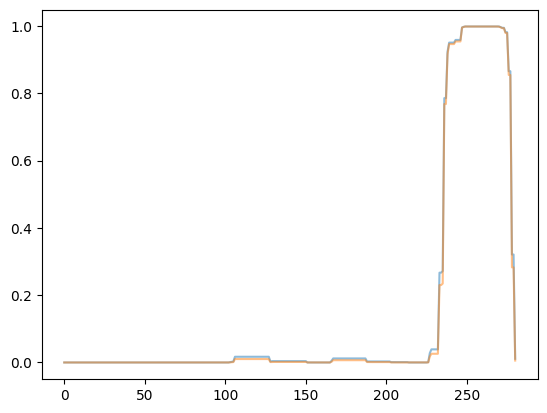

COILS vs PyCOILS @ matrix MTK uw 28: [OK]


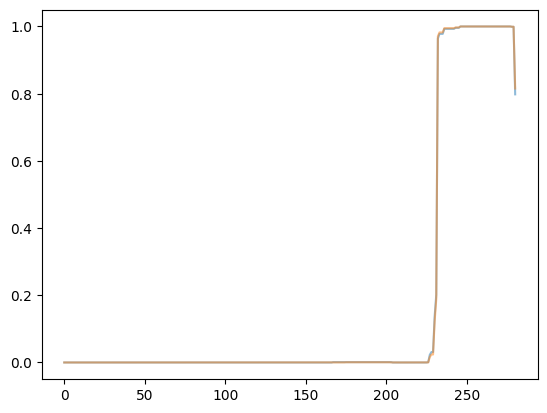

In [10]:
testing.test_vs_COILS(graphics=True)